In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

### 1.获取数据集

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

### 2.数据预处理

In [9]:
from sklearn.model_selection import train_test_split

# 对数据集中的数据进行分割，并指定随机种子
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=666)

# 将训练集再细分为训练集和验证集
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=888)

### 3.特征工程

In [11]:
from sklearn.preprocessing import StandardScaler

# 对训练集、验证集、测试集进行规范化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### 4.搭建模型

In [15]:
# 使用wide-deep模型，构建方法不一样


# 1.设置输入层，指定数据形状
m_input = keras.layers.Input(shape=x_train.shape[1:])  # 指定shape时必须传入元组

# 2.设置隐藏层，并指定传入的数据来源、神经元数、激活函数
hidden1 = keras.layers.Dense(30, activation='relu')(m_input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# 3.拼接input层和hidden2层的数据，并设置为输出层
concat = keras.layers.concatenate([m_input, hidden2])
output = keras.layers.Dense(1)(concat)

# 4.初始化模型，传入m_input和output
model = keras.models.Model(inputs = [m_input],
                           outputs = [output])

# 5.编译模型，指定损失函数、优化器
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))

# 6.指定回调函数
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]


### 5.训练模型

In [16]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.0470 - val_loss: 0.7545
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7290 - val_loss: 0.6577
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6569 - val_loss: 0.6163
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6197 - val_loss: 0.5823
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5900 - val_loss: 0.5582
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5690 - val_loss: 0.5390
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5497 - val_loss: 0.5260
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5353 - val_loss: 0.5147
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5232 - val_loss: 0.5020
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - val_lo

### 6.训练过程可视化

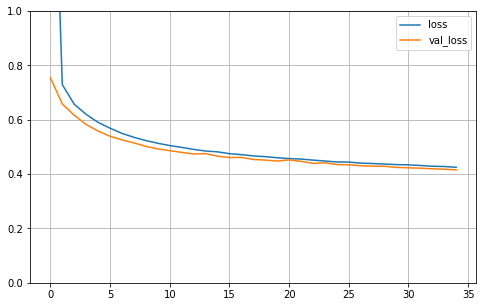

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

### 7.使用测试集测试模型

In [20]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4253


0.42534080147743225